In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
from scipy import stats
%matplotlib inline

In [52]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

In [62]:
data = w.wsd('881001.WI', 'close', '2015-01-01', '2019-03-19')

In [63]:
pdf = pd.DataFrame(data.Data[0], index=data.Times, columns=['881001.WI'])

In [64]:
df = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/881001.WI.xlsx')

In [66]:
df = df[df.index >= '2015-01-01']

In [72]:
df.tail()

turnover days  current return  profit percentage
2019-03-25      37.215042        0.039420           0.611762
2019-03-26      36.632591        0.008228           0.442816
2019-03-27      36.337604        0.012393           0.485170
2019-03-28      36.074095       -0.004101           0.397114
2019-03-29      35.654039        0.019769           0.558919

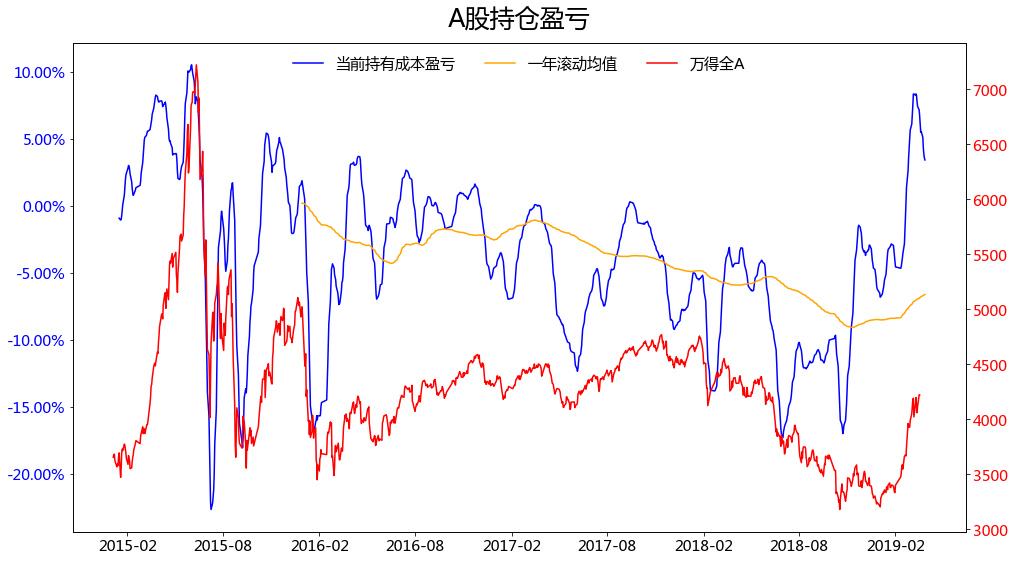

In [75]:
fig, ax = plt.subplots(figsize=(16, 9))
lns1 = ax.plot(df.index, df['current return'].rolling(window=10).mean(), color='blue', label=u'当前持有成本盈亏')
lns2 = ax.plot(df.index, df['current return'].rolling(window=243).mean(), label=u'一年滚动均值', color='orange')
axx = ax.twinx()
lns3 = axx.plot(pdf['881001.WI'], color='red', label=u'万得全A')

lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1))

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
axx.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}%'.format(x*100) for x in vals], color='blue')
vals = axx.get_yticks()
axx.set_yticklabels(['{:3.0f}'.format(x) for x in vals], color='red')

_ = ax.set_title(u'A股持仓盈亏', fontsize=25, y=1.02)

In [20]:
df.tail()

turnover days  current return  profit percentage
2019-03-13      42.884615        0.058062           0.685927
2019-03-14      42.028412        0.022920           0.539707
2019-03-15      41.398050        0.034857           0.612758
2019-03-18      40.649582        0.054050           0.734472
2019-03-19      40.327989        0.053829           0.723397

In [21]:
df = df.merge(pdf, left_index=True, right_index=True)

In [22]:
df = df[df.index >= '2011-01-01']

In [23]:
df.head()

turnover days  current return  profit percentage  881001.WI
2011-01-04      35.560545       -0.032693           0.348269  2780.8210
2011-01-05      35.898185       -0.031114           0.349147  2768.9219
2011-01-06      36.307460       -0.034239           0.324897  2754.5686
2011-01-07      36.671537       -0.038240           0.294197  2761.8760
2011-01-10      37.017094       -0.060089           0.194400  2709.3159

In [24]:
K = 20
df['return'] = df['881001.WI'].pct_change(K).shift(-K)

In [25]:
x = df[df['current return'] < 0]['current return']
y = df[df['current return'] < 0]['return']

In [26]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x[:-K], y[:-K])

In [27]:
line = slope * x[:-K] + intercept
print slope, intercept

-0.20451866350787556 -0.010608407947159464


[Text(0,0,'-40.00%'),
 Text(0,0,'-30.00%'),
 Text(0,0,'-20.00%'),
 Text(0,0,'-10.00%'),
 Text(0,0,'0.00%'),
 Text(0,0,'10.00%'),
 Text(0,0,'20.00%'),
 Text(0,0,'30.00%'),
 Text(0,0,'40.00%')]

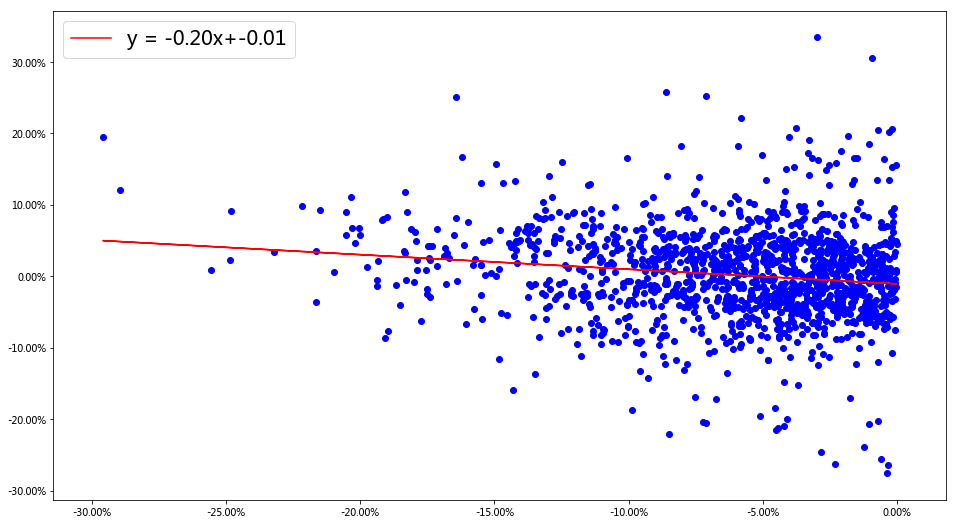

In [28]:
# plt.figure(figsize=(16, 9))
fig, ax = plt.subplots(figsize=(16, 9))
plt.scatter(x, y, color='blue', label='')
plt.plot(x[:-K], line, 'red', label='y = %.2fx+%.2f'%(slope, intercept))
plt.legend(fontsize=20)
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.2f}%'.format(e*100) for e in vals])
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(e*100) for e in vals])

In [29]:
# df.groupby(pd.cut(df['current return'], [-0.3,-0.25,-0.2,-0.15,-0.1,-0.05,0,0.05,0.1])).mean()
groupdf = df.groupby(pd.cut(df['current return'], [-0.25,-0.2,-0.15,-0.1,-0.05,0,0.05,0.1])).mean()

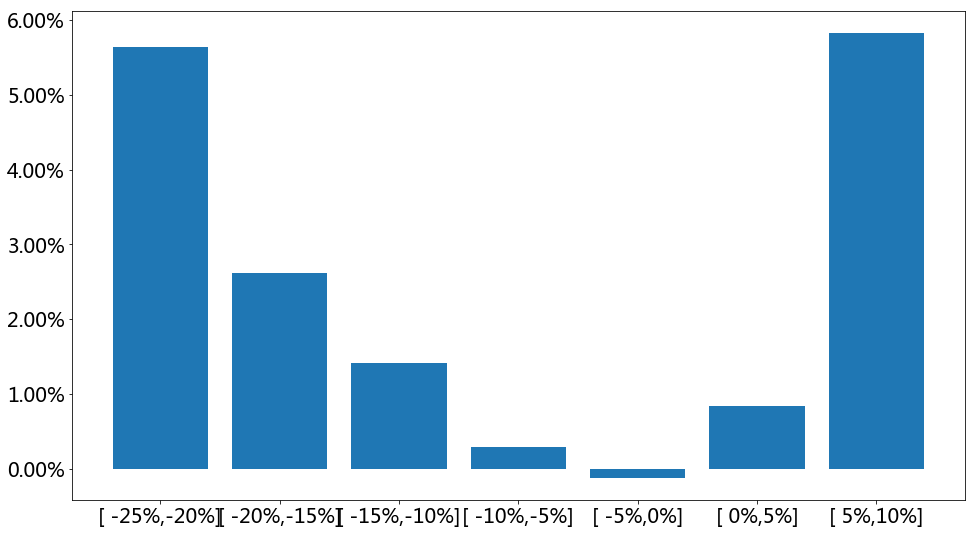

In [36]:
# plt.figure(figsize=(16, 9))
fig, ax = plt.subplots(figsize=(16, 9))
x = np.arange(groupdf.shape[0])
plt.bar(x, groupdf['return'])
plt.xticks(x, ('[ -25%,-20%]', '[ -20%,-15%]', '[ -15%,-10%]', '[ -10%,-5%]', '[ -5%,0%]', '[ 0%,5%]', '[ 5%,10%]'), size=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals], size=15)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

In [37]:
fig.savefig(u'./pic/持仓成本柱状图.jpg', dpi=200, bbox_inches='tight')

In [31]:
slope * df['current return'][-1] + intercept

-0.02161745364810231

In [32]:
df['current return'][-1]

0.05382905164798767

In [33]:
slope * -0.1414122431711222 + intercept

0.01831303502984915

In [34]:
df['return'].mean()

0.007358540936694746